## Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Loading the data

In [3]:
import pandas as pd

url = "../data/sierraleone-bumbuna.csv"

# If it's a CSV:
df = pd.read_csv(url)
print(df.shape)
df.head()


(525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


# 1. Summary Statistics & Missing-Value Report

In [4]:
print("An overview of the dataset: a random sample of 5 rows")
df.sample(5)

An overview of the dataset: a random sample of 5 rows


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
372044,2022-07-15 08:45,185.9,0.7,185.4,183.6,179.7,24.4,97.5,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,29.5,30.1,NaN
230344,2022-04-07 23:05,-7.5,-0.4,-7.8,0.0,0.0,26.2,85.2,0.9,1.1,0.4,120.9,6.5,1000,0,0.0,25.6,26.0,NaN
250969,2022-04-22 06:50,6.5,-0.2,6.2,14.6,13.8,22.4,88.9,0.0,0.0,0.0,0.0,0.0,998,0,0.0,22.3,22.6,NaN
315166,2022-06-05 20:47,-0.9,-0.2,-1.0,0.0,0.0,27.9,82.9,2.7,3.1,0.5,256.8,11.1,1000,0,0.0,28.2,28.3,NaN
265477,2022-05-02 08:38,45.8,0.0,44.9,57.2,56.0,23.1,98.0,1.6,2.1,0.4,73.4,9.2,1002,0,0.0,24.4,24.5,NaN


In [5]:
print("The description of the numeric columns:")
print(df.describe())

The description of the numeric columns:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000

In [6]:
# Calculate percentage of missing values per column
null_percent = (df.isna().sum() / len(df)) * 100

# Filter columns with >5% missing values
cols_over_5 = null_percent[null_percent > 5]

# Display the result
print("Columns with more than 5% missing values:")
#print(cols_over_5)
# Calculate percent of missing values
null_percent = (df.isna().sum() / len(df)) * 100

# List columns with >5% nulls
cols_over_5 = null_percent[null_percent > 5].index.tolist()

print("Columns with >5% nulls:", cols_over_5)


Columns with more than 5% missing values:
Columns with >5% nulls: ['Comments']


# 2. Outlier Detection & Basic Cleaning

## Check missing values

In [7]:
# Columns to check for missing values
cols_to_check = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]

print("Missing values in key columns:")
df[cols_to_check].isna().sum()


Missing values in key columns:


GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64

## Check Incorrect / Impossible Values

In [8]:
print("Incorrect or impossible entries (negative values):")

for col in cols_to_check:
    invalid_rows = df[df[col] < 0]
    count_invalid = len(invalid_rows)
    print(f"{col}: {count_invalid} incorrect values found")


Incorrect or impossible entries (negative values):
GHI: 261135 incorrect values found
DNI: 266352 incorrect values found
DHI: 263128 incorrect values found
ModA: 0 incorrect values found
ModB: 0 incorrect values found
WS: 0 incorrect values found
WSgust: 0 incorrect values found



## Outlier Detection Using IQR Method

In [9]:

print("\nOutlier Detection ")

for col in cols_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"{col}: {len(outliers)} outlier rows")



Outlier Detection 
GHI: 15853 outlier rows
DNI: 101688 outlier rows
DHI: 4407 outlier rows
ModA: 21017 outlier rows
ModB: 20613 outlier rows
WS: 3169 outlier rows
WSgust: 3665 outlier rows


## Z-scores and flag rows with |Z| > 3

In [11]:
from scipy.stats import zscore
z_scores = df[cols_to_check].apply(zscore)

# Flag rows where any column has |Z| > 3
outliers_mask = (np.abs(z_scores) > 3).any(axis=1)
outlier_rows = df[outliers_mask]

print("Number of rows with |Z| > 3:", outliers_mask.sum())
print(outlier_rows)

Number of rows with |Z| > 3: 16292
               Timestamp    GHI    DNI    DHI   ModA   ModB  Tamb    RH   WS  \
653     2021-10-30 10:54  814.0  257.0  594.3  878.0  856.0  25.9  85.3  0.5   
654     2021-10-30 10:55  826.0  263.5  599.6  883.0  861.0  26.0  85.4  1.7   
655     2021-10-30 10:56  851.0  285.0  605.9  912.0  890.0  26.0  84.2  1.6   
656     2021-10-30 10:57  823.0  254.8  603.9  878.0  856.0  26.0  85.3  0.8   
657     2021-10-30 10:58  810.0  244.5  598.8  864.0  843.0  26.1  85.7  0.6   
...                  ...    ...    ...    ...    ...    ...   ...   ...  ...   
522184  2022-10-27 15:05  167.2   -0.5  165.1  167.6  160.9  30.4  68.3  5.3   
522185  2022-10-27 15:06  163.4   -0.6  161.0  165.7  159.2  30.2  67.7  7.1   
522194  2022-10-27 15:15  183.5    0.3  181.6  173.7  168.7  29.3  70.2  4.9   
523792  2022-10-28 17:53   31.3   -0.5   30.2   34.3   32.3  28.4  79.5  5.0   
523794  2022-10-28 17:55   22.8   -0.8   21.4   26.5   25.0  27.9  80.4  5.0   

    

## Handle Missing Values in Key Columns

In [12]:
df_dropped = df.dropna(subset=cols_to_check)
print("Shape after dropping rows with missing values:", df_dropped.shape)

# Option 2: Impute missing values with median
df_imputed = df.copy()
for col in cols_to_check:
    median_value = df_imputed[col].median()
    df_imputed[col].fillna(median_value)

print("Missing values after median imputation:\n", df_imputed[cols_to_check].isna().sum())

Shape after dropping rows with missing values: (525600, 19)
Missing values after median imputation:
 GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


## saving clean data

In [13]:
import os

df_clean = df_imputed[~outliers_mask]  # keep only rows where all |Z| <= 3
print("After removing Z-score outliers:", df_clean.shape)
os.makedirs("data", exist_ok=True)
output_file = "../data/sierraleone_clean.csv"
df_clean.to_csv(output_file, index=False)
print("Cleaned dataset saved to:", output_file)

After removing Z-score outliers: (509308, 19)
Cleaned dataset saved to: ../data/sierraleone_clean.csv


## Time Series Analysis

## Line or bar charts of GHI, DNI, DHI, Tamb vs. Timestamp

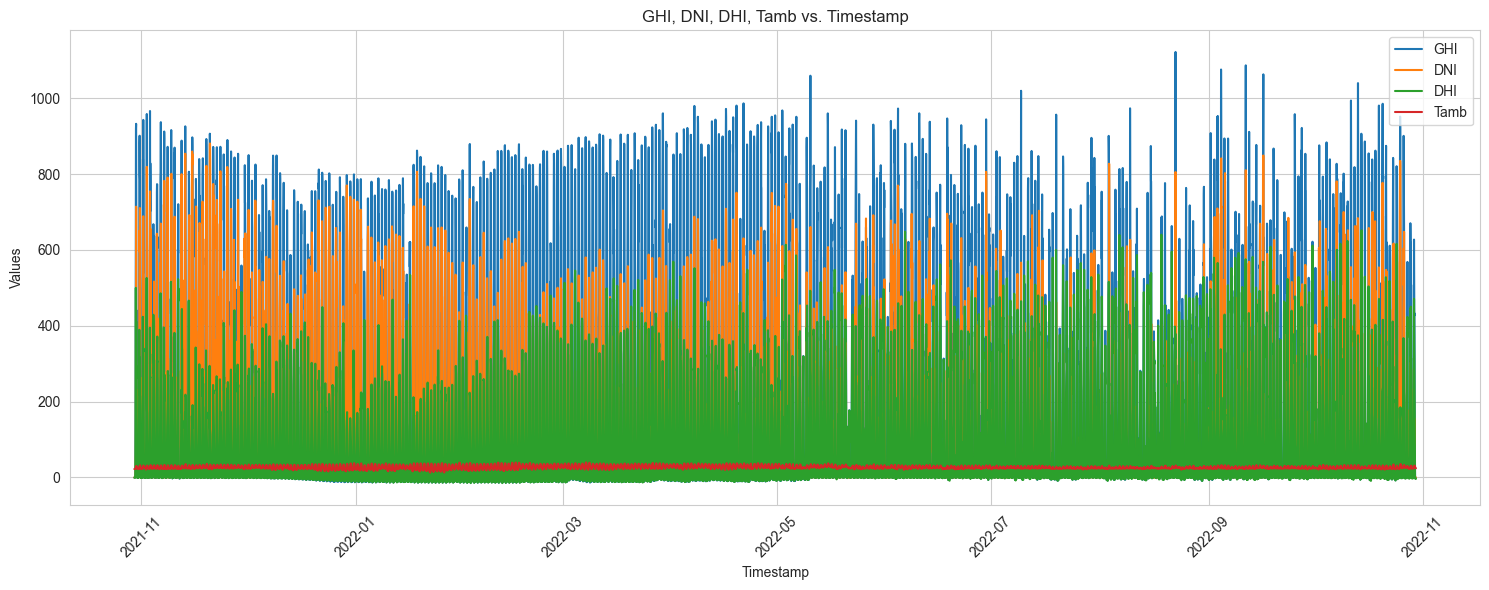

In [14]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Optional: resample hourly to reduce overplotting
df_hourly = df.set_index('Timestamp').resample('h').mean()

# Plot
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))
plt.plot(df_hourly.index, df_hourly['GHI'], label='GHI')
plt.plot(df_hourly.index, df_hourly['DNI'], label='DNI')
plt.plot(df_hourly.index, df_hourly['DHI'], label='DHI')
plt.plot(df_hourly.index, df_hourly['Tamb'], label='Tamb')

plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('GHI, DNI, DHI, Tamb vs. Timestamp')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Observe patterns by month, trends throughout the day, or anomalies, such as peaks in solar irradiance or temperature fluctuations. 



## Seasonal Patterns and Trends by Month

The plot clearly illustrates **seasonal variations** primarily driven by the change in the sun's path and intensity throughout the year.

* **Winter/Lower Irradiance Period (Approx. Nov 2021 - Feb 2022):**
    * **Lower Peaks:** Maximum values for GHI (blue) and DNI (orange) are noticeably **lower** during this period, often peaking in the **800-900 W/$m^2$** range.
    * **Higher DHI Contribution:** The green area representing **Diffuse Horizontal Irradiance (DHI)** appears to occupy a relatively **larger visual proportion** of the total GHI, suggesting a higher frequency of partially cloudy or hazy skies, scattering more sunlight.
* **Summer/Higher Irradiance Period (Approx. May 2022 - Aug 2022):**
    * **Highest Peaks:** GHI and DNI frequently reach and exceed **1000 W/$m^2$**, indicating maximum solar intensity and longer daylight hours.
    * **High Variability:** While peaks are high, the daily bars show rapid, sharp drops and rises, suggesting a highly **variable mix of clear and cloudy periods** typical of convective weather patterns in summer.
* **Transition Months (Mar - Apr 2022 & Sep - Oct 2022):**
    * These months show a **smooth increase and decrease** in the maximum GHI and DNI peaks, bridging the difference between the winter and summer seasons.

---

## Daily Trends and Variability

The stacked bar pattern across the entire year represents the **daily cycle**:

* **Solar Irradiance:** All irradiance components (GHI, DNI, DHI) consistently **rise and fall to zero** within each 24-hour period, reflecting the sun's path from sunrise to sunset. The peak of each daily bar represents the solar noon.
* **DNI vs. DHI Fluctuations:** The **Direct Normal Irradiance (DNI)** is the most volatile variable. The sharp, rapid drops in the orange area (DNI) often correspond to the sun being **directly blocked by a cloud**. Simultaneously, the **Diffuse Horizontal Irradiance (DHI)** often **increases** (green area widens) as the cloud scatters the sunlight, a fundamental principle of atmospheric radiation.
* **Ambient Temperature ($T_{amb}$):** The temperature trace (red line) is located very close to the x-axis, suggesting its values are consistently low relative to the irradiance scale (likely in the $0$ to $50$ range if the irradiance units are W/$m^2$). It shows a relatively **smooth daily oscillation** (high during the day, low at night) with minimal visually apparent annual change compared to the irradiance data.

---

## Anomalies and Key Observations

* **Solar Peaks:** The frequent peaks of GHI at or above $1000 \text{ W/}m^2$ are not strictly anomalies but represent the **maximum potential solar resource** available at this location.
* **Highly Spiked Data:** The abundance of very thin, tall spikes (especially in GHI and DNI) indicates that the data is likely recorded at a **high frequency** (e.g., minute-by-minute), capturing the rapid, transient effect of **passing clouds** on direct sunlight.
* **Consistent $T_{amb}$:** The $T_{amb}$ line is very close to the horizontal axis and appears relatively **flat** throughout the entire year, which is striking. This suggests either a very **mild climate** with a small annual temperature range, or that the temperature scale is compressed due to the high irradiance values dominating the y-axis display.

## Cleaning Impact

## Group by Cleaning flag and plot average ModA & ModB pre/post-clean.

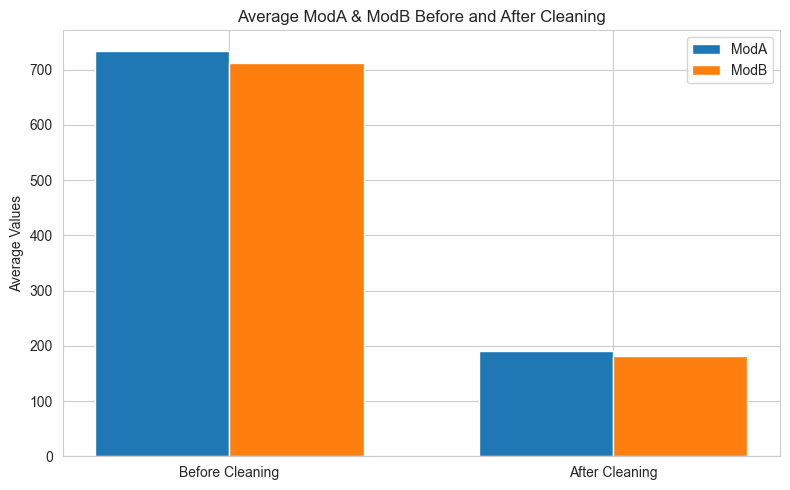

   Cleaning_Flag        ModA        ModB  Cleaning_Status
0              0  734.298355  711.448607  Before Cleaning
1              1  189.764194  181.693908   After Cleaning


In [15]:
## Cleaning Impact
## Group by Cleaning flag and plot average ModA & ModB pre/post-clean.

# Create a 'Cleaning_Flag' column
# (1 = kept after cleaning, 0 = removed as outlier)
df['Cleaning_Flag'] = np.where(outliers_mask, 0, 1)

# Group by Cleaning flag
mod_stats = df.groupby('Cleaning_Flag')[['ModA', 'ModB']].mean().reset_index()

# Rename for readability
mod_stats['Cleaning_Status'] = mod_stats['Cleaning_Flag'].map({1: 'After Cleaning', 0: 'Before Cleaning'})

# Plot
plt.figure(figsize=(8,5))
bar_width = 0.35
x = np.arange(len(mod_stats['Cleaning_Status']))

plt.bar(x - bar_width/2, mod_stats['ModA'], width=bar_width, label='ModA')
plt.bar(x + bar_width/2, mod_stats['ModB'], width=bar_width, label='ModB')

plt.xticks(x, mod_stats['Cleaning_Status'])
plt.ylabel('Average Values')
plt.title('Average ModA & ModB Before and After Cleaning')
plt.legend()
plt.tight_layout()
plt.show()

print(mod_stats)


## Correlation & Relationship Analysis

## Heatmap of correlations (GHI, DNI, DHI, TModA, TModB)

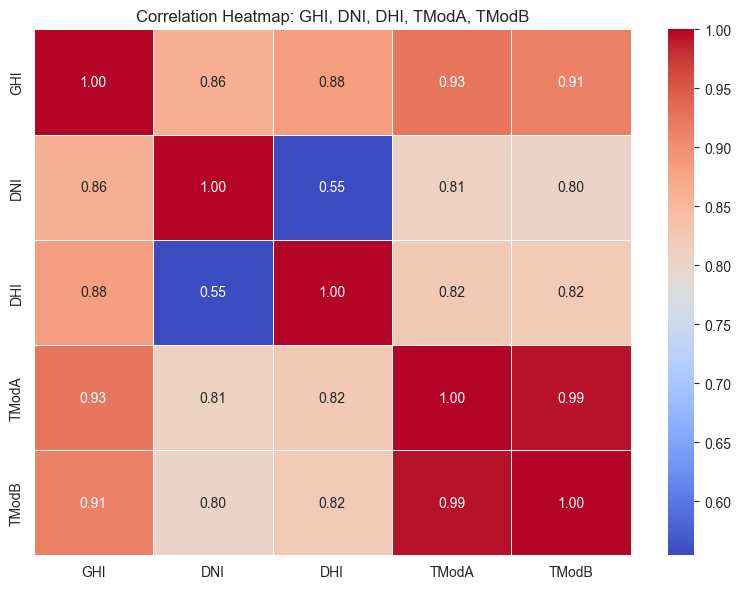

In [16]:
## Heatmap of correlations (GHI, DNI, DHI, TModA, TModB)




# Select relevant columns
corr_cols = ["GHI", "DNI", "DHI", "TModA", "TModB"]
# Compute correlation matrix

corr_matrix = df_clean[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: GHI, DNI, DHI, TModA, TModB")
plt.tight_layout()
plt.show()


## Scatter plots: WS, WSgust, WD vs. GHI; RH vs. Tamb or RH vs. GHI.

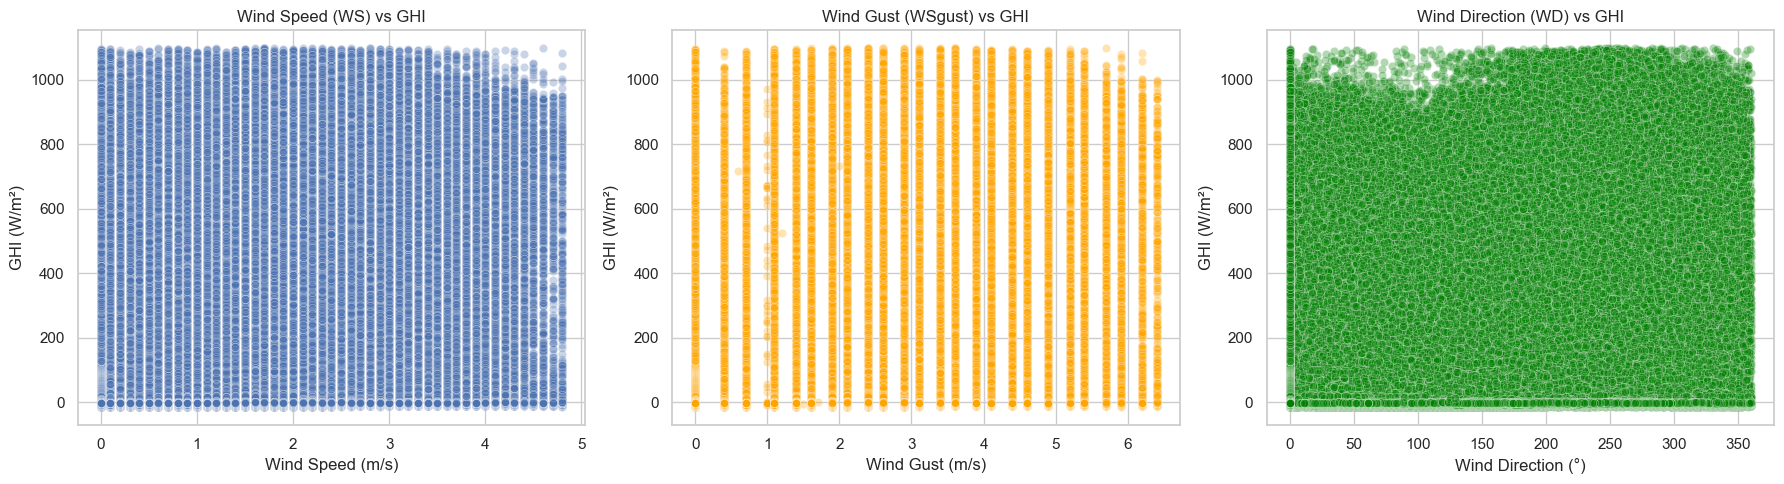

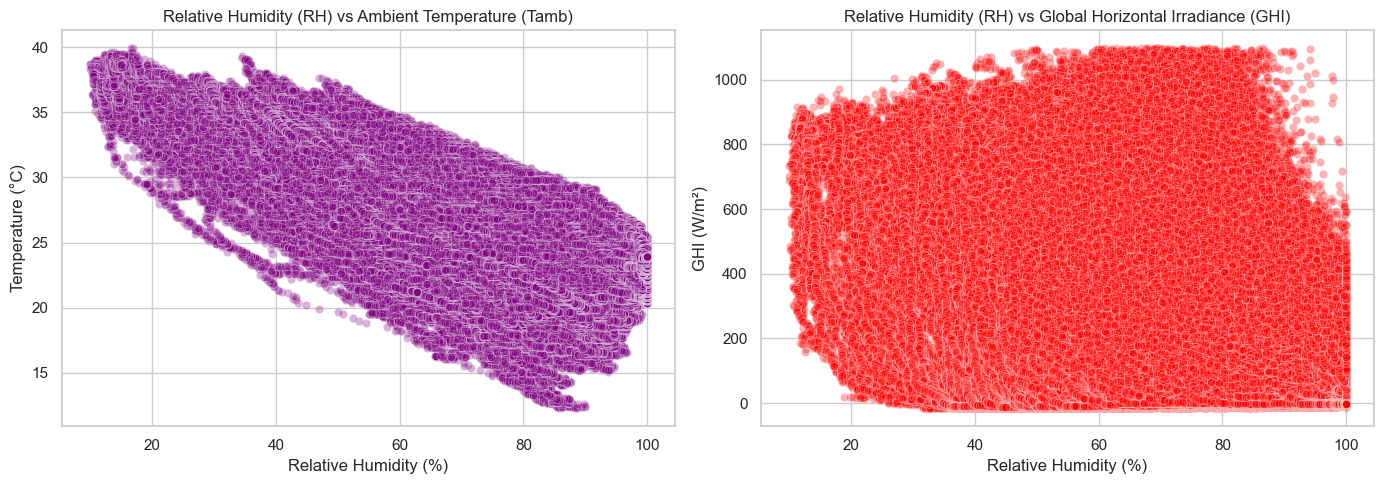

In [17]:
## Scatter Plots: WS, WSgust, WD vs. GHI; RH vs. Tamb or RH vs. GHI

# Set the visual style
sns.set(style="whitegrid", context="notebook")

# 1. WS, WSgust, WD vs. GHI
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(data=df_clean, x="WS", y="GHI", alpha=0.3, ax=axes[0])
axes[0].set_title("Wind Speed (WS) vs GHI")
axes[0].set_xlabel("Wind Speed (m/s)")
axes[0].set_ylabel("GHI (W/m²)")

sns.scatterplot(data=df_clean, x="WSgust", y="GHI", alpha=0.3, ax=axes[1], color="orange")
axes[1].set_title("Wind Gust (WSgust) vs GHI")
axes[1].set_xlabel("Wind Gust (m/s)")
axes[1].set_ylabel("GHI (W/m²)")

sns.scatterplot(data=df_clean, x="WD", y="GHI", alpha=0.3, ax=axes[2], color="green")
axes[2].set_title("Wind Direction (WD) vs GHI")
axes[2].set_xlabel("Wind Direction (°)")
axes[2].set_ylabel("GHI (W/m²)")

plt.tight_layout()
plt.show()

# 2. RH vs Tamb and RH vs GHI
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.scatterplot(data=df_clean, x="RH", y="Tamb", alpha=0.3, ax=axes[0], color="purple")
axes[0].set_title("Relative Humidity (RH) vs Ambient Temperature (Tamb)")
axes[0].set_xlabel("Relative Humidity (%)")
axes[0].set_ylabel("Temperature (°C)")

sns.scatterplot(data=df_clean, x="RH", y="GHI", alpha=0.3, ax=axes[1], color="red")
axes[1].set_title("Relative Humidity (RH) vs Global Horizontal Irradiance (GHI)")
axes[1].set_xlabel("Relative Humidity (%)")
axes[1].set_ylabel("GHI (W/m²)")

plt.tight_layout()
plt.show()


## Wind & Distribution Analysis

## Wind rose or radial bar plot of WS/WD

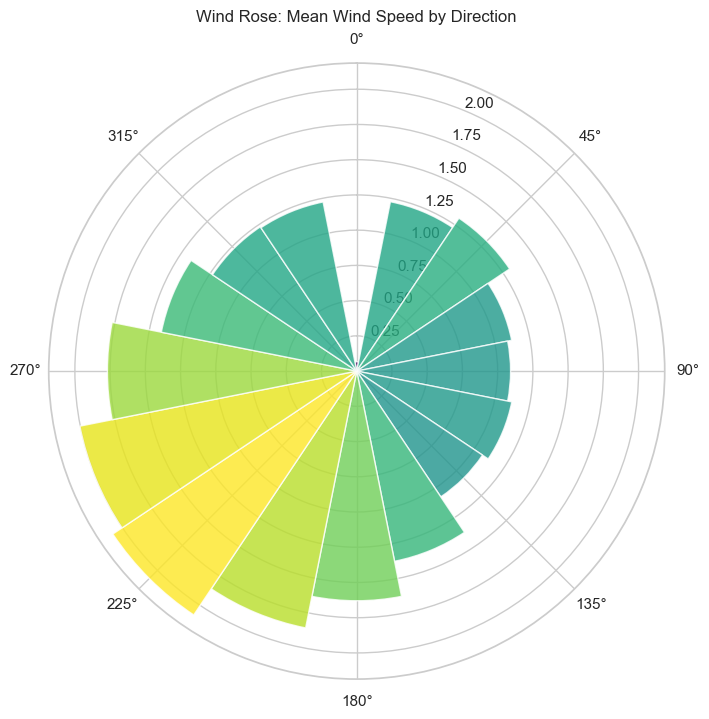

In [19]:
## Wind & Distribution Analysis
## Wind rose or radial bar plot of WS/WD

import numpy as np
import matplotlib.pyplot as plt

# Drop NaNs for safety
wind_data = df_clean[['WD', 'WS']].dropna()

# Convert degrees to radians for polar plotting
wind_dir_rad = np.deg2rad(wind_data['WD'])

# Define wind speed bins
speed_bins = [0, 2, 4, 6, 8, 10, 12, 20]
wind_data['WS_bin'] = pd.cut(wind_data['WS'], bins=speed_bins, labels=speed_bins[1:])

# Calculate frequency of each direction bin
num_bins = 16  # divide full circle into 16 sectors (22.5° each)
bins = np.linspace(0, 2 * np.pi, num_bins + 1)
wind_data['dir_bin'] = pd.cut(wind_dir_rad, bins=bins, labels=False, include_lowest=True)

# Average WS per direction bin
wind_mean = wind_data.groupby('dir_bin')['WS'].mean()
angles = np.linspace(0, 2 * np.pi, num_bins, endpoint=False)

# Plot wind rose
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
bars = ax.bar(angles, wind_mean, width=2*np.pi/num_bins, color=plt.cm.viridis(wind_mean / wind_mean.max()), alpha=0.8)

ax.set_theta_zero_location("N")  # 0° at north
ax.set_theta_direction(-1)       # clockwise
ax.set_title("Wind Rose: Mean Wind Speed by Direction", va='bottom')

plt.show()


## Histograms for GHI and one other variable (e.g., WS)

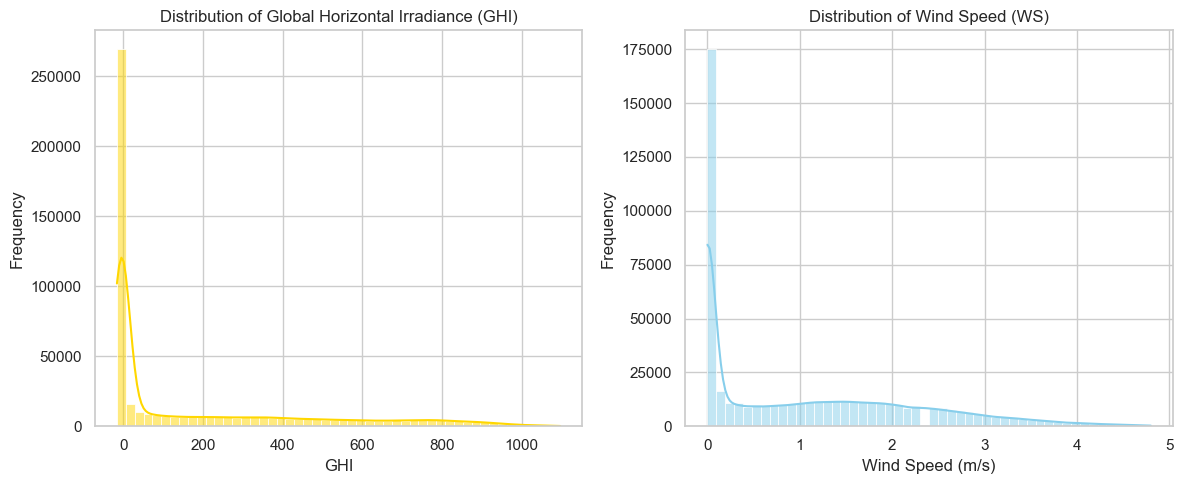

In [20]:
## Distribution Analysis
## Histograms for GHI and WS

import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms
plt.figure(figsize=(12, 5))

# GHI Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_clean['GHI'], bins=50, kde=True, color='gold')
plt.title('Distribution of Global Horizontal Irradiance (GHI)')
plt.xlabel('GHI')
plt.ylabel('Frequency')

# WS Histogram
plt.subplot(1, 2, 2)
sns.histplot(df_clean['WS'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Wind Speed (WS)')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Temperature Analysis

## Examine how relative humidity (RH) might influence temperature readings and solar radiation

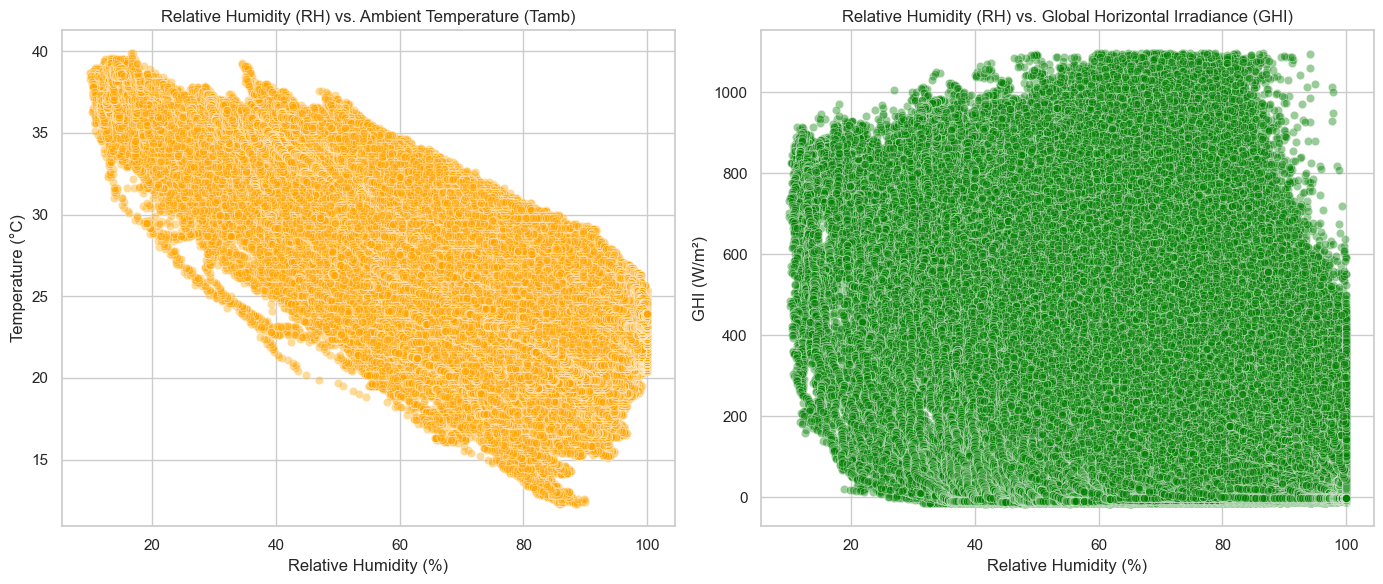

In [22]:
## Temperature Analysis
## Examine how relative humidity (RH) might influence temperature readings and solar radiation

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Scatter plot: RH vs Tamb
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_clean, x='RH', y='Tamb', alpha=0.4, color='orange')
plt.title('Relative Humidity (RH) vs. Ambient Temperature (Tamb)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')

# Scatter plot: RH vs GHI
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_clean, x='RH', y='GHI', alpha=0.4, color='green')
plt.title('Relative Humidity (RH) vs. Global Horizontal Irradiance (GHI)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')

plt.tight_layout()
plt.show()


## Bubble Chart

## GHI vs. Tamb with bubble size = RH or BP

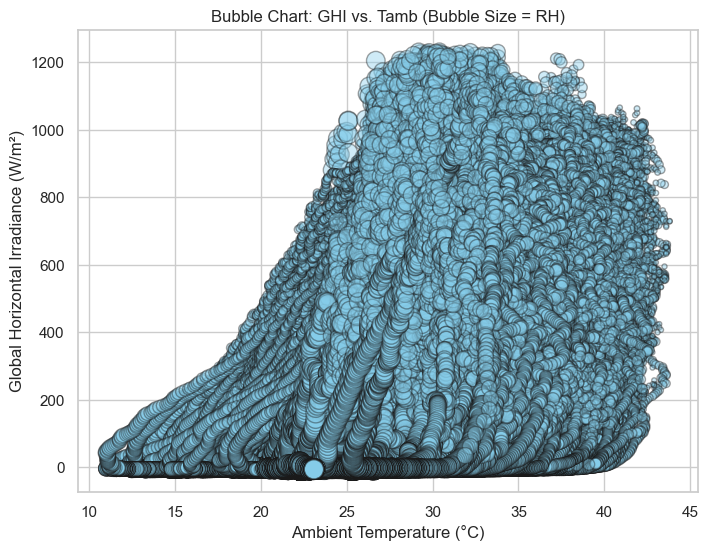

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Bubble chart: GHI vs Tamb, bubble size = RH
plt.scatter(df_clean['Tamb'], df_clean['GHI'],
            s=df_clean['RH'] * 2,   # Scale bubble size for visibility
            alpha=0.4, c='skyblue', edgecolors='k')

plt.title('Bubble Chart: GHI vs. Tamb (Bubble Size = RH)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('Global Horizontal Irradiance (W/m²)')
plt.show()
